# Climate - MALIN HEAD
---
In this notebook, I analysed the meteorological conditions collected at the Malin Head station in Donegal County, Ireland. This information was extracted by Met Éireann and can be found in the following [link](https://cli.fusio.net/cli/climate_data/webdata/hly1575.zip). I downloaded the data into the [CSV folder](https://github.com/FatimaBOliveira/Programming-for-data-analytics/tree/main/Project/csv).

## Load the data
To analyse the data with Python, the package pandas has to be imported. Then the CSV file can be loaded into the program with [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), using the path and the name of the file. Then I noticed that the indices are located in row 24, so I needed to skip the first 23 rows. I also used low_memory=False because it was showing a [DtypeWarning](https://pandas.pydata.org/docs/reference/api/pandas.errors.DtypeWarning.html) when loading the CSV. This means that the DataFrame is very long with mixed data types in some columns, so to avoid the machine deducing some results, this parameter is set to False.

In [1]:
# Import libraries.
import pandas as pd

In [2]:
# Name of the file.
FILENAME = "hly1575.csv"

# Path to the file.
DATADIR = "./csv/"

# Identify the file.
logFilename = DATADIR + FILENAME

# Load the CSV.
df = pd.read_csv(logFilename, skiprows=23, low_memory=False)

# Check the first 3 rows.
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-may-1955 01:00,0,0.0,0,8.5,0,7.2,5.5,9.1,83,...,0,11,0,130,3,2,0.0,30000,40,7
1,01-may-1955 02:00,0,0.0,0,8.2,0,7.2,6.1,9.3,85,...,0,11,0,120,1,2,0.0,30000,100,6
2,01-may-1955 03:00,3,0.0,0,7.3,0,6.6,5.5,9.3,91,...,0,8,0,120,1,2,0.0,30000,220,5


This dataset has 21 variables, and the description of the indices can be found at the top of the [CSV file](https://github.com/FatimaBOliveira/Programming-for-data-analytics/blob/main/Project/csv/hly1575.csv), and in detail in the [KeyHourly.txt](https://github.com/FatimaBOliveira/Programming-for-data-analytics/blob/main/Project/csv/KeyHourly.txt).

## Analyse data

In this part I checked the [data types](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) and if there's any [missing or invalid data](https://stackoverflow.com/questions/49677060/pandas-count-empty-strings-in-a-column/77288170#77288170). This is very important to know because Python encounters problems in analysing unclear data. To avoid issues, the variables need to be cleaned before doing a deep analysis.

In [3]:
# Check variable types.
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb      object
dewpt     object
vappr     object
rhum      object
msl      float64
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun       object
vis       object
clht      object
clamt     object
dtype: object

In [4]:
# Check if there are any missing values in the data set.
df.isnull().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [5]:
# Check if there are any empty values.
df.eq(" ").sum()

date          0
ind           0
rain          3
ind.1         0
temp          0
ind.2         0
wetb          6
dewpt         6
vappr         6
rhum          6
msl           0
ind.3         0
wdsp         52
ind.4         0
wddir       106
ww       130148
w        130148
sun      130032
vis      130228
clht     130172
clamt    130172
dtype: int64

In [6]:
# check if there are "0" values.
df.eq(0).sum()

date          0
ind      488318
rain          0
ind.1    607604
temp        276
ind.2    605431
wetb          0
dewpt         0
vappr         0
rhum          0
msl           0
ind.3    173882
wdsp          0
ind.4    173883
wddir         0
ww            0
w             0
sun           0
vis           0
clht          0
clamt         0
dtype: int64

## Wind speeds for energy production

Now that the data has been analysed, there are some variables that show some interest and might have some potential for energy production in this location, for example, with the installation of windmills. For this, I checked if the wind speed registered was good enough in the past years for windmills, and if it's a good location to install them.
As the [Irish Wind Energy Association stated](http://www.iwea.ie/index.cfm/page/technicalfaqs?#q29), the minimum wind speed necessary to produce energy is at [Beaufort Scale](https://www.met.ie/cms/assets/uploads/2022/09/Beaufort-scale-for-land.png) (BS) 3, 7 knots, and the maximum output is reached at BS 5, 21 knots. When the wind speed is higher than BS 10, 48 knots, the wind turbines stop working to prevent damage.

To check the wind speed over time, the "date" variable needs to be converted to datetime object with [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html), to create a clear plot of the time, otherwise the machine will treat date as an object, and it won't recognise periods of time. After that, I identify the days and the months with [.dt.strftime](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html).

In [7]:
#  Use datetime to treat the column "date" as datetime object.
df["date"]= pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

In [8]:
# select the days.
days= df["date"].dt.strftime("%Y-%m-%d")

# Select the months.
months= df["date"].dt.strftime("%Y-%m")

After that, I created a new DataFrame with only date and wind speed to simplify. Then, I dropped the [empty values](https://saturncloud.io/blog/how-to-filter-out-records-with-null-or-empty-strings-in-python-pandas/#using-boolean-indexing) from the wind speed, and because this variable is identified as [an object](https://stackoverflow.com/questions/64890665/how-do-i-fix-this-type-error-value-must-be-an-instance-of-str-or-bytes-not-a#comment114730210_64890983), I changed it to numeric with [pd.to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html), as speed is always a number. After that, I [dropped the "0" values](https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame/55066805#55066805), and even though the wind speed can be 0, this is very uncommon, so I discarded those values.

In [9]:
# New data frame with date and wind speed.
dfwp=df[["date","wdsp"]]

# Drop the empty values.
dfwp = dfwp[dfwp["wdsp"] != " "]

# Change the "wdsp" type from object to integer.
dfwp["wdsp"] = pd.to_numeric(dfwp["wdsp"], errors="coerce")

# Drop the 0 values.
dfwp = dfwp[dfwp["wdsp"] != 0]

# Show.
dfwp

,date,wdsp
0,1955-05-01 01:00:00,11
1,1955-05-01 02:00:00,11
2,1955-05-01 03:00:00,8
3,1955-05-01 04:00:00,18
4,1955-05-01 05:00:00,9
...,...,...
609283,2024-10-31 20:00:00,12
609284,2024-10-31 21:00:00,13
609285,2024-10-31 22:00:00,13
609286,2024-10-31 23:00:00,14


### Daily mean wind speeds

To examine the wind speeds in the last years, the best way to visualise it is with plots. These are generated through [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) and [Seaborn](https://seaborn.pydata.org/).

This DataFrame is very long, and instead of considering each entry, I calculated the daily mean wind speeds to make the plot easier to read. The code [.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) puts all the data of a day together and [.transform](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html) calculates the mean for this group.
After that, I created a new column with the daily mean wind speeds.

In [10]:
# Import Matplotlib and Seaborn libraries.
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Calculate the daily wind speeds mean.
daily_mean_wind = dfwp.groupby(days)["wdsp"].transform("mean")

# Create a new column.
dfwp["daily_mean_wind"] = daily_mean_wind

# Check
dfwp.head(3)

,date,wdsp,daily_mean_wind
0,1955-05-01 01:00:00,11,19.434783
1,1955-05-01 02:00:00,11,19.434783
2,1955-05-01 03:00:00,8,19.434783


For the plots, I customized the size of them with [plt.rcParams](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#default-values-and-styling) and this sets the default size for all the upcoming plots. Then, I created a function called grid with customizations parameters, to make the plot pleasant to read. I included the following:
- minor ticks, [plt.minorticks_on](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.minorticks_on.html); 
- grid lines, [plt.grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html); 
- two [x lines](https://www.geeksforgeeks.org/plot-a-horizontal-line-in-matplotlib/), [plt.axhline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html), representing the minimum (red line) and the optimal (green line) wind speeds for energy production; 
- and annotations, [plt.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html), for the minimum and optimal wind speeds with [arrows and boxes](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html#customizing-arrow-and-bubble-styles).

This function is easily applied in many plots every time it's called, reducing the amount of codes used.

In [12]:
# Set the size of the figure.
plt.rcParams["figure.figsize"] = (20, 10)

# Function grid for plot customization.
def grid():
    plt.minorticks_on() # Minor ticks between the main ticks.
    plt.grid(which="both", linestyle="--") # Configure the grid lines.
    plt.axhline(y = 7, color = 'r', linestyle = '-') # X red line representing the minimum wind speed for energy production.
    plt.axhline(y = 28, color = 'g', linestyle = ':') # X green line representing the maximum wind speed for energy production.
    plt.annotate("MIN", xy=(-6000, 7), xycoords='data', xytext=(0, -30), textcoords='offset points', size=10, 
             bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=-90,rad=10")) # Annotation for the minimum wind speed.
    plt.annotate("Optimal", xy=(-6000, 28), xycoords='data', xytext=(0, 30), textcoords='offset points', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=45,rad=10")) # Annotation for the optimal wind speed.

I added separately the x line and the annotation for the maximum wind speed because they were making the future plots smaller.
To plot, I called the grid function, added a [title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) and showed it with [sns.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

<Axes: title={'center': 'Daily mean wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

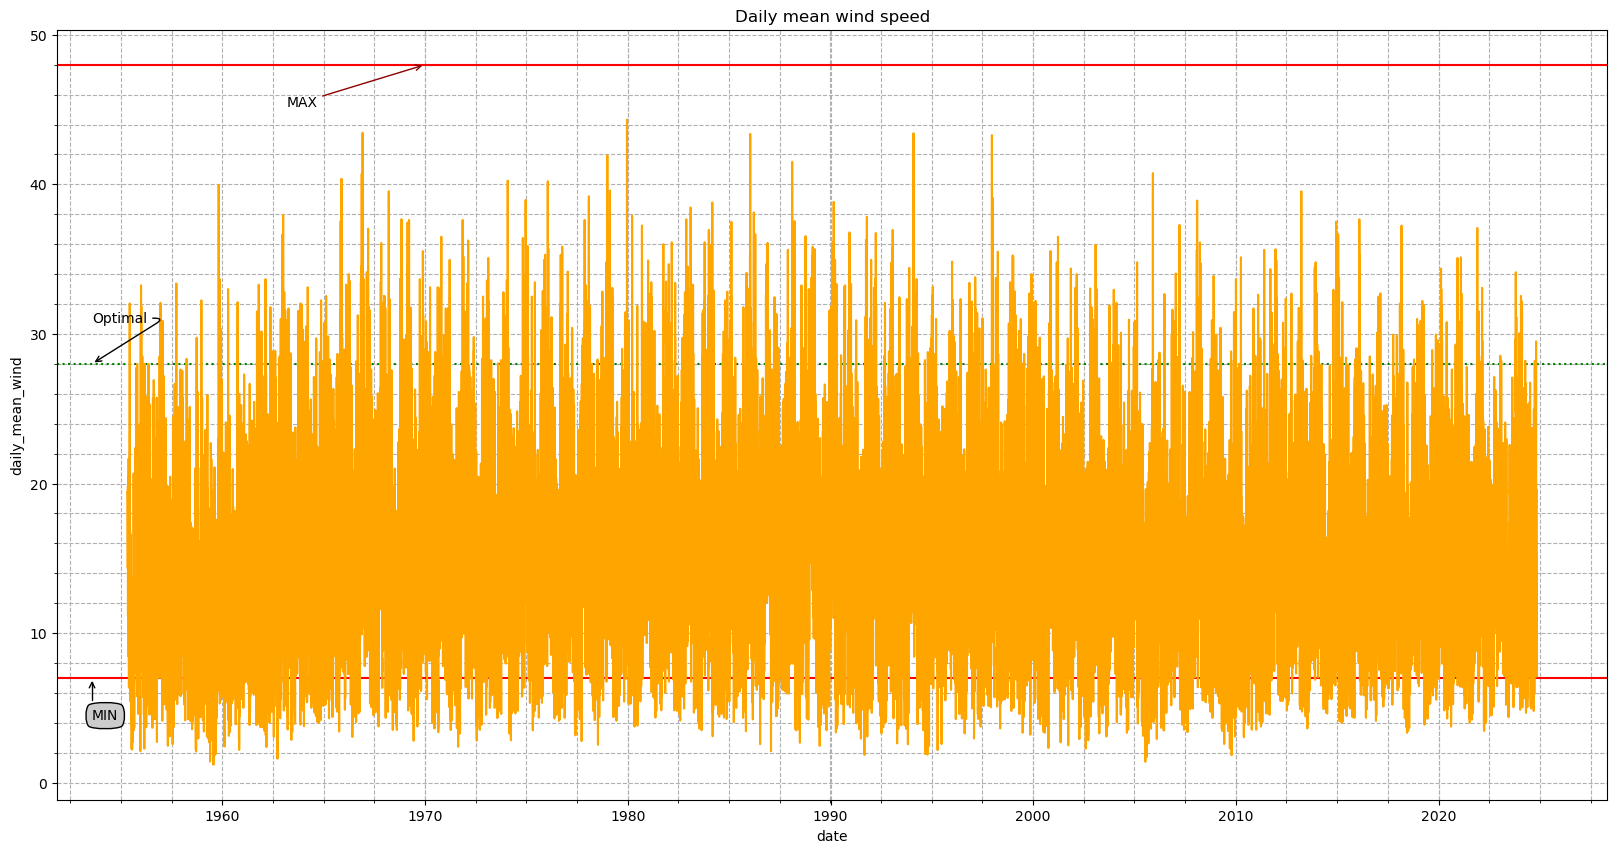

In [13]:
# Add x line representing the maximum wind speed for energy production.
plt.axhline(y = 48, color = 'r', linestyle = '-')

# Add annotation for the maximum wind speed.
plt.annotate("MAX", xy=(0,48), xytext=(-100, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='darkred'))

# Apply grid.
grid()

# Add title.
plt.title("Daily mean wind speed")

# Plot.
sns.lineplot(data=dfwp, x="date", y="daily_mean_wind", color="orange")

The graph shows that it would be possible to produce energy in the past years considering the wind speeds in this location. There were some days that the wind speeds weren't enough, but in the majority of the days that would happen, and in some the optimal energy could be reached. None of the days presented very high wind speeds, and that indicates that the windmills wouldn't suffer too much damage over time.

### Monthly mean wind speed
In this next plot, I calculated the monthly mean wind speeds. I used the same codes as above, but this time I selected the months instead of the days. Then, I created a new column with this new data. After that, I plotted again with seaborn, applied the grid, and added a title. This shows if there could be any month without energy production.

In [14]:
# Calculate the monthly wind speeds mean.
monthly_mean_wind = dfwp.groupby(months)["wdsp"].transform("mean")

# Create a new column.
dfwp["monthly_mean_wind"] = monthly_mean_wind

# Check.
dfwp.head(3)

,date,wdsp,daily_mean_wind,monthly_mean_wind
0,1955-05-01 01:00:00,11,19.434783,14.651351
1,1955-05-01 02:00:00,11,19.434783,14.651351
2,1955-05-01 03:00:00,8,19.434783,14.651351


<Axes: title={'center': 'Monthly mean wind speed'}, xlabel='date', ylabel='monthly_mean_wind'>

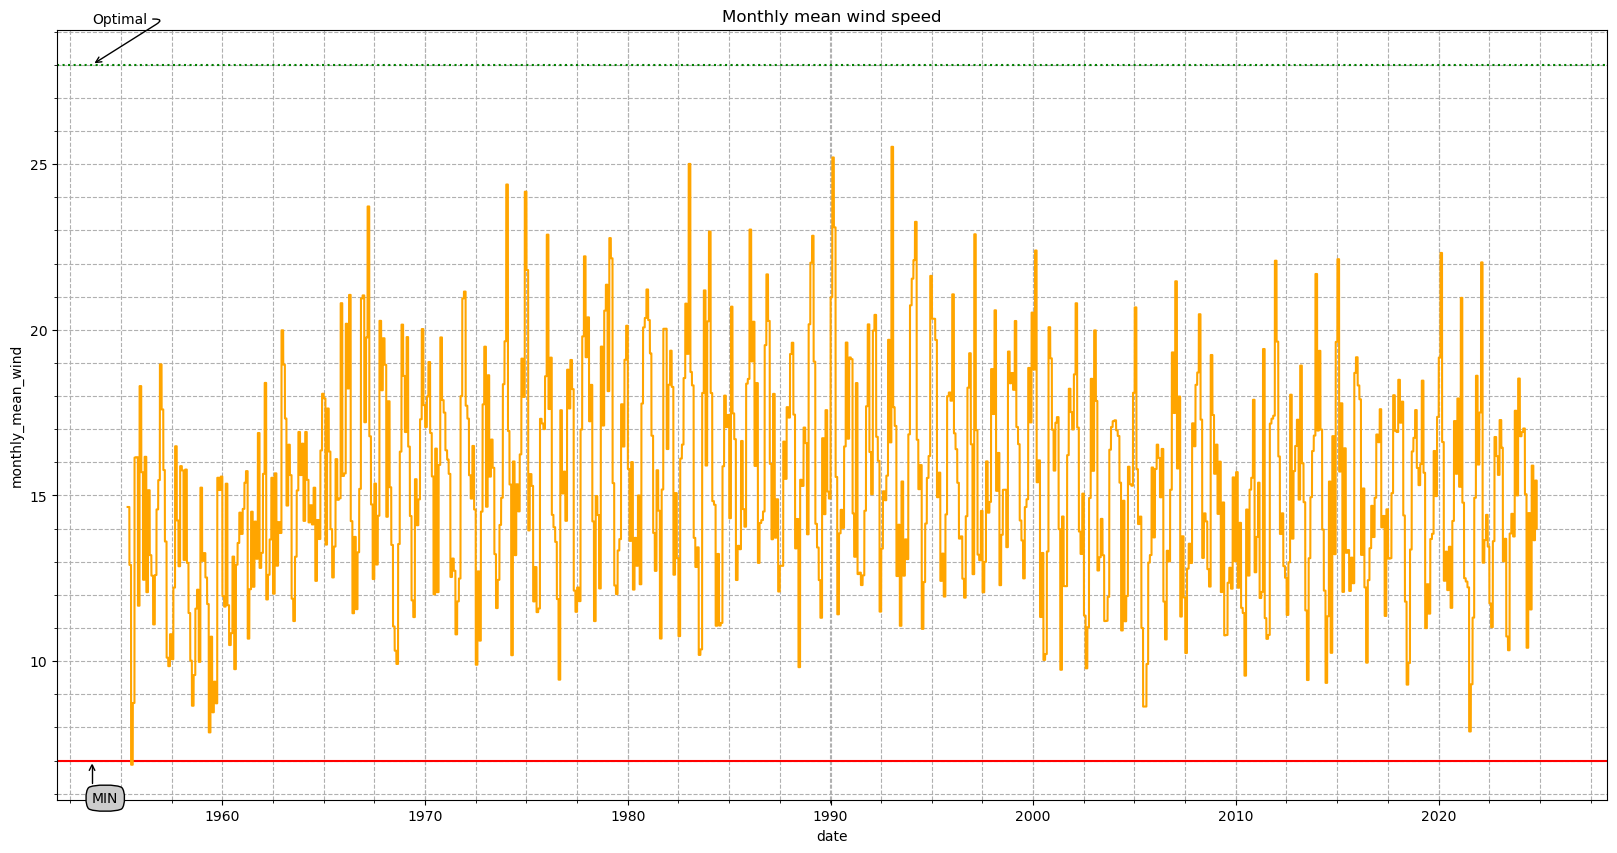

In [15]:
# Add grid.
grid()

# Add title.
plt.title("Monthly mean wind speed")

# Plot.
sns.lineplot(data=dfwp, x="date", y="monthly_mean_wind", color="orange")

The graph shows at least one month in the 1950s, when the wind speeds weren't enough to produce energy. It also shows that none of the months would achieve the optimal wind speed.

### Prediction
#### Next decade
In this part, I imported [NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html) library to predict the wind speeds in the next 10 years. To generate the dates, I used the function [pd.date_range](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html) to create evenly spaced times or dates. Over the years, the wind speeds have shown a consistent tendency, so I used [np.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html) for the machine to create new data, considering the mean of the monthly mean wind speeds and the standard deviation, with the size defined in future_dates. Then, I made a DataFrame with this new data, with the future dates and wind speeds. Then to compare this new data with the previous data, I used [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) to mix both DataFrames, and plot them after.

In [16]:
# Import library.
import numpy as np

# Generate future dates.
future_dates = pd.date_range(start="2024-11", periods=10*12, freq="ME")

# Mean of the monthly mean wind speeds.
mean_wind = dfwp["monthly_mean_wind"].mean()

# Standard deviation of the monthly mean wind speeds.
std_wind = dfwp["monthly_mean_wind"].std()

# Generate future wind speed values.
future_wind = np.random.normal(loc=mean_wind, scale=std_wind, size=len(future_dates))

# Create a DataFrame for the hypothetical data.
future_years = pd.DataFrame({
    'date': future_dates,
    'monthly_mean_wind': future_wind
})

# Append the hypothetical data to the original DataFrame.
dfwp_extended = pd.concat([dfwp, future_years])

# Check.
dfwp_extended

,date,wdsp,daily_mean_wind,monthly_mean_wind
0,1955-05-01 01:00:00,11.0,19.434783,14.651351
1,1955-05-01 02:00:00,11.0,19.434783,14.651351
2,1955-05-01 03:00:00,8.0,19.434783,14.651351
3,1955-05-01 04:00:00,18.0,19.434783,14.651351
4,1955-05-01 05:00:00,9.0,19.434783,14.651351
...,...,...,...,...
115,2034-06-30 00:00:00,NaN,NaN,12.309431
116,2034-07-31 00:00:00,NaN,NaN,19.818531
117,2034-08-31 00:00:00,NaN,NaN,17.385411
118,2034-09-30 00:00:00,NaN,NaN,16.745854


<Axes: title={'center': 'Wind speed in the past and future'}, xlabel='date', ylabel='monthly_mean_wind'>

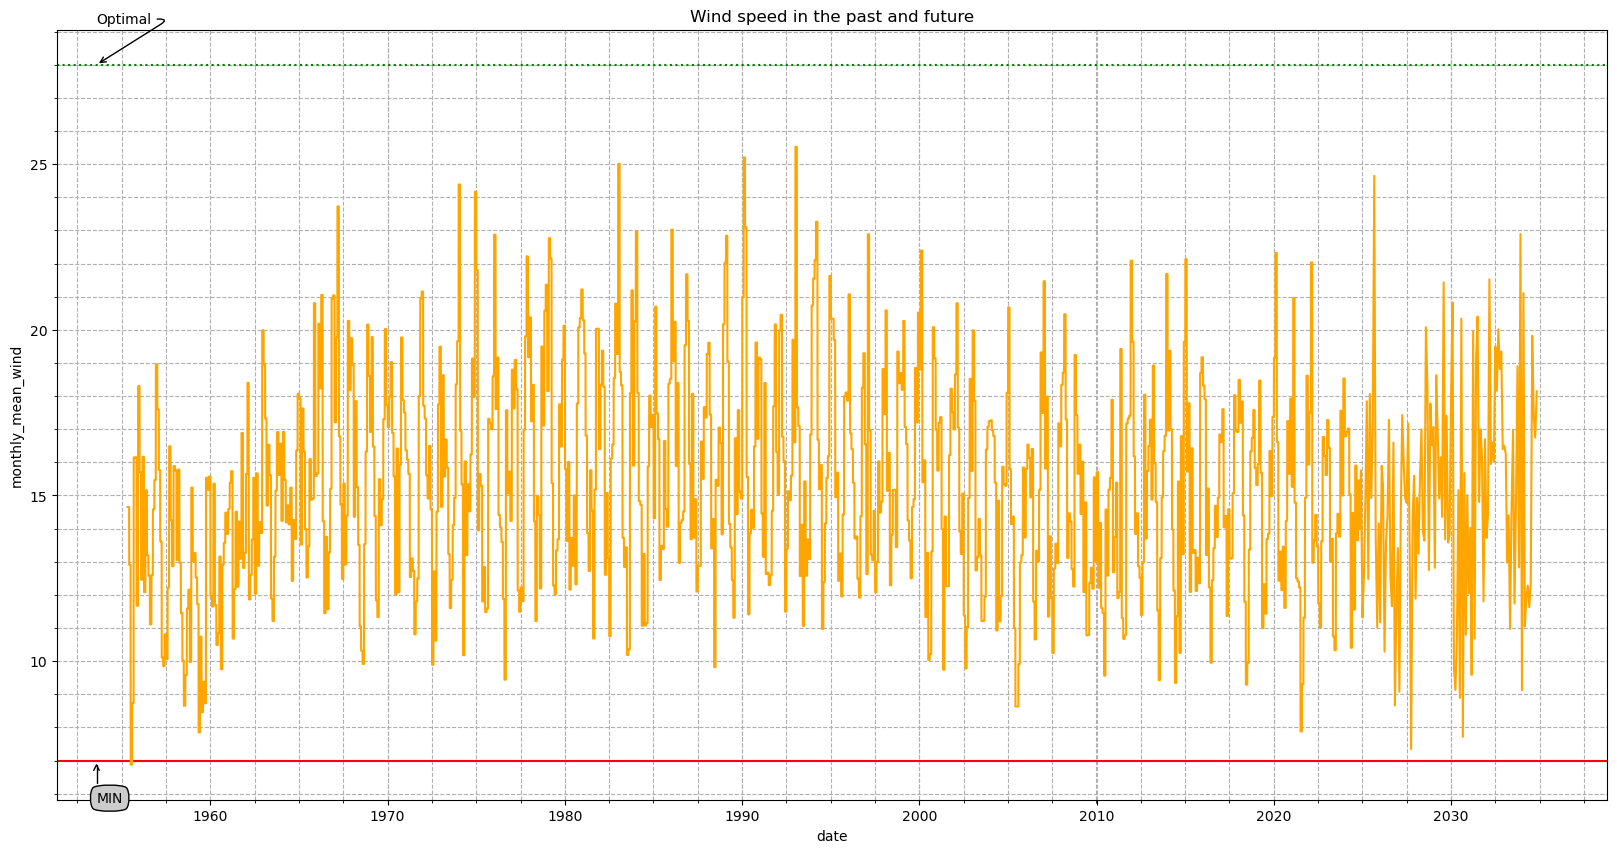

In [17]:
# Apply grid.
grid()

# Add title.
plt.title("Wind speed in the past and future")

# Plot.
sns.lineplot(data=dfwp_extended, x="date", y="monthly_mean_wind", color="orange")

To conclude, the predicted years show a similar trend compared to previous years.

#### Next week
I applied the same logic to predict the wind speeds in the next 7 days. To make the plot precise, I considered only the collected data of daily mean wind speeds in [November months](https://discuss.python.org/t/pandas-add-the-similar-months-in-a-column/30725/7). Then, I created another DataFrame with this new data and added it to the original. For the plot, I [selected only the dates](https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/) from the last week of October and the prediction for the first week of November with [.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html).

In [18]:
# Create a column with the months.
dfwp["month"]= dfwp["date"].dt.month

# Generate future dates.
future_week = pd.date_range(start="2024-11-02", periods=7, freq='D')

# Select data from November months.
november= dfwp[(dfwp["month"]==11)]

# Calculate the mean.
n_mean_wind = november["daily_mean_wind"].mean()

# Calculate the standard deviation.
n_std_wind = november["daily_mean_wind"].std()

# Generate future wind speed values.
d_future_wind = np.random.normal(loc=n_mean_wind, scale=n_std_wind, size=len(future_week))

# Create a DataFrame for the hypothetical data.
future_week = pd.DataFrame({
    'date': future_week,
    'daily_mean_wind': d_future_wind
})

# Add generated data to the original DataFrame.
dfwp_nov = pd.concat([dfwp, future_week])

# Check.
dfwp_nov

,date,wdsp,daily_mean_wind,monthly_mean_wind,month
0,1955-05-01 01:00:00,11.0,19.434783,14.651351,5.0
1,1955-05-01 02:00:00,11.0,19.434783,14.651351,5.0
2,1955-05-01 03:00:00,8.0,19.434783,14.651351,5.0
3,1955-05-01 04:00:00,18.0,19.434783,14.651351,5.0
4,1955-05-01 05:00:00,9.0,19.434783,14.651351,5.0
...,...,...,...,...,...
2,2024-11-04 00:00:00,NaN,26.053850,NaN,NaN
3,2024-11-05 00:00:00,NaN,14.537036,NaN,NaN
4,2024-11-06 00:00:00,NaN,22.504813,NaN,NaN
5,2024-11-07 00:00:00,NaN,17.313479,NaN,NaN


<Axes: title={'center': 'Future wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

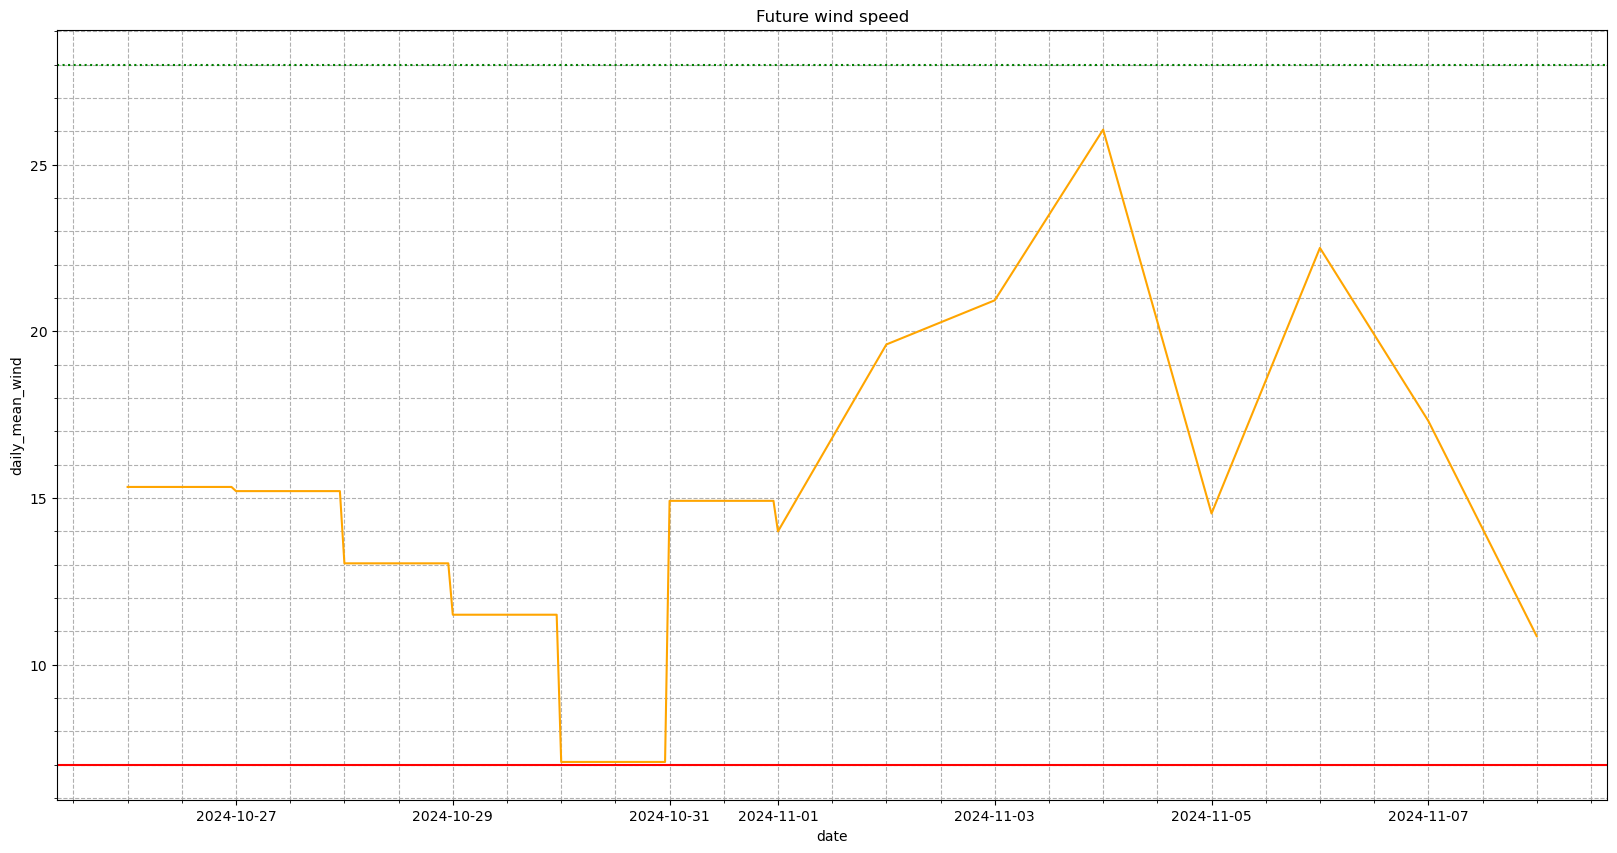

In [19]:
# Add grid.
grid()

# Add title.
plt.title("Future wind speed")

# Data of previous week and future week.
df_filtered = dfwp_nov.loc[(dfwp_nov["date"] >= "2024-10-26")]

# Plot.
sns.lineplot(data=df_filtered, x="date", y="daily_mean_wind", color="orange")

As shown in the plot, the wind speeds in the first week of November is predicted to be high and increasing slightly. This is expected, and this tendency is confirmed in the following plot of monthly mean wind speeds for each month.

<Axes: title={'center': 'Monthly mean wind speed'}, xlabel='month', ylabel='monthly_mean_wind'>

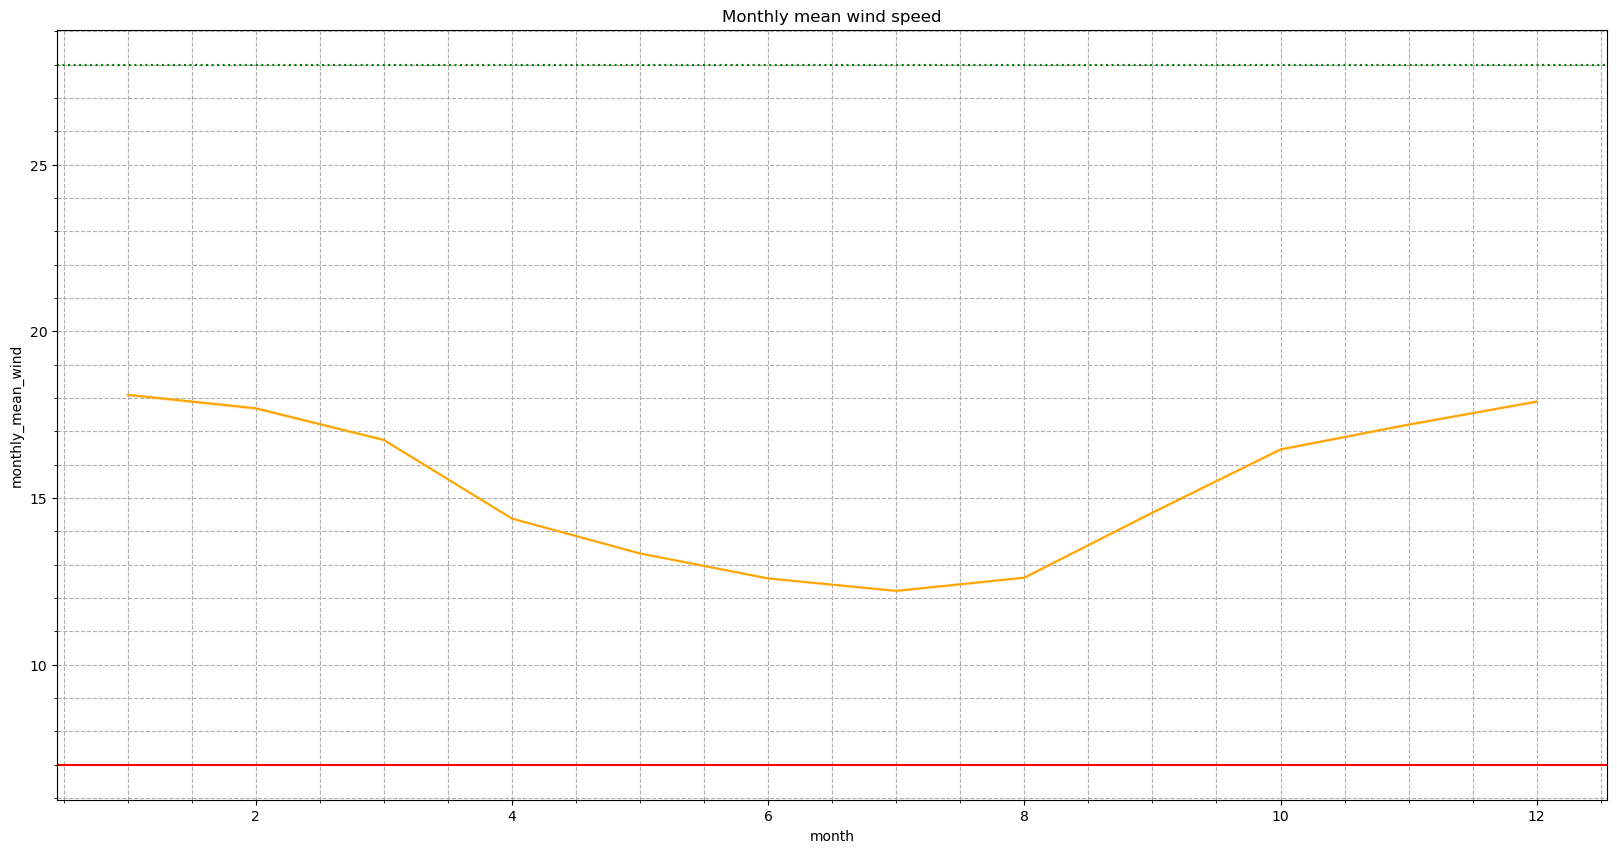

In [20]:
# Apply grid.
grid()

# Add title.
plt.title("Monthly mean wind speed")

# Plot.
sns.lineplot(data=dfwp, x="month", y="monthly_mean_wind", color="orange")

As it shows, the wind speed is usually higher in November, compared with October.

## Windmills

The Malin Head area shows potential for energy production as the wind speeds are usually sufficient for most years. I searched if there was any plan to install windmills in this location, and I found one project from [Source Galileo](https://malinheadoffshorewind.ie/). This company plans the construction of a wind farm in Malin Head offshore. [This project](https://malinheadoffshorewind.ie/about-project) will support the Irish Government’s Climate Action Plan, aiming for energy production of up to 1000 Megawatts (MW), providing power to an estimated 850,000 households per annum.

The project is based on Malin Head offshore, and the data collected in this DataFrame was taken on land. The conditions probably differ a bit, but this data can already give a good indication of the potential of this area for energy production. I calculated the hypothetical energy production for each windmill with the following [equation](https://www.geeksforgeeks.org/wind-energy-formula/):

$P = 1/2 x ρ x A x v^3$

- $P = Power (W)$
- $ρ = Density (kg/m^3)$
- $A = Swept$ $Area (m^2)$
- $v = Wind$ $Speed (m/s)$

I considered the [standard density of air](https://www.e-education.psu.edu/emsc297/node/649), which is $1.225 kg/m^3$.

Then for the swept area, I needed to set the dimensions of the wind turbines. The [European Wind Energy Association](https://www.ewea.org/wind-energy-basics/faq/#:~:text=How%20big%20is%20a%20wind,than%201%2C500%20average%20EU%20households) indicates that most wind turbine blades are around 50 meters in length. Considering this size, it's now possible to calculate the swept area of the turbine, with the following [formula](https://mmpa.org/wp-content/uploads/2015/09/Swept-Area-Provided-by-Kid-Wind-PDF.pdf): $A = π × r^2 = π × 50^2= 7854 m^2$

The wind speed in this DataFrame is in knots, so I converted these values into miles per second in order to apply the energy production formula. The [conversion is](https://en.wikipedia.org/wiki/Knot_(unit)#Definitions) 1 knot = 0.51444 m/s. Before making this conversion, I [filtered](https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/#filter-data-using-specific-values) the wind speeds that don't produce any energy, so I didn't consider the values that are lower than 7 knots and higher than 48.

In [21]:
# Drop wind speeds that are lower than 7 knots.
dfwp = dfwp[dfwp["wdsp"] > 7]

# Drop the wind speeds that are higher than 48 knots.
dfwp = dfwp[dfwp["wdsp"] < 48]

So after selecting only the wind speeds that produce energy, I converted these into the miles per second. After that, I finally applied the formula representing the energy production divided by 1000, to get it in kilowatts (kW), as 1 kW = 1000 W.

In [22]:
# Convert knots into miles per second.
dfwp["wdsp_ms"]= dfwp["wdsp"]* 0.51444

# Calculate energy produced in kilowatts.
dfwp["power_kw"]=(0.5*1.225*7854*dfwp["wdsp_ms"]**3)/1000

# Show the data.
dfwp

,date,wdsp,daily_mean_wind,monthly_mean_wind,month,wdsp_ms,power_kw
0,1955-05-01 01:00:00,11,19.434783,14.651351,5,5.65884,871.724464
1,1955-05-01 02:00:00,11,19.434783,14.651351,5,5.65884,871.724464
2,1955-05-01 03:00:00,8,19.434783,14.651351,5,4.11552,335.329020
3,1955-05-01 04:00:00,18,19.434783,14.651351,5,9.25992,3819.607118
4,1955-05-01 05:00:00,9,19.434783,14.651351,5,4.62996,477.450890
...,...,...,...,...,...,...,...
609283,2024-10-31 20:00:00,12,14.916667,15.448925,10,6.17328,1131.735442
609284,2024-10-31 21:00:00,13,14.916667,15.448925,10,6.68772,1438.902064
609285,2024-10-31 22:00:00,13,14.916667,15.448925,10,6.68772,1438.902064
609286,2024-10-31 23:00:00,14,14.916667,15.448925,10,7.20216,1797.153966


### Daily mean power production
In this next section, I calculated the daily mean power produced, using again the codes .groupby and .transform. Then I created a new column with those values.

In [23]:
# Calculate the daily mean power.
daily_mean_power = dfwp.groupby(days)["power_kw"].transform("mean")

# Create a new column.
dfwp["daily_mean_power"] = daily_mean_power

After that, I plotted the energy generated in 4 different years, with 20 years apart from each other, to see if there's a similar tendency. For this, I created a new variable with a list of the years to analyse. Then I used a [dictionary](https://realpython.com/iterate-through-dictionary-python/#traversing-a-dictionary-directly), df_year, to select all the data from those years, with [.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html).

Then I [set a figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to show 4 subplots, with a 2x2 layout and chosen size. After that, I created a [for function](https://stackoverflow.com/questions/71160580/how-do-i-use-a-for-loop-and-the-zip-function-to-plot-subplots-in-python/71161178#71161178) that outputs each year in one subplot, with [zip](https://realpython.com/python-zip-function/#traversing-lists-in-parallel) working as an iterator, and with [.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) returning the arrays into 1 dimension, making it possible to do a [for loop](https://aeturrell.github.io/coding-for-economists/vis-matplotlib.html#subplots) with the [years selected](https://napsterinblue.github.io/notes/python/viz/subplots/). In this function, I added a title and axes labels for each year.

Finally, I used [plt.tight_layout](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html) to prevent the title and the axes labels from being too close to each other, which will make the plot cleaner.

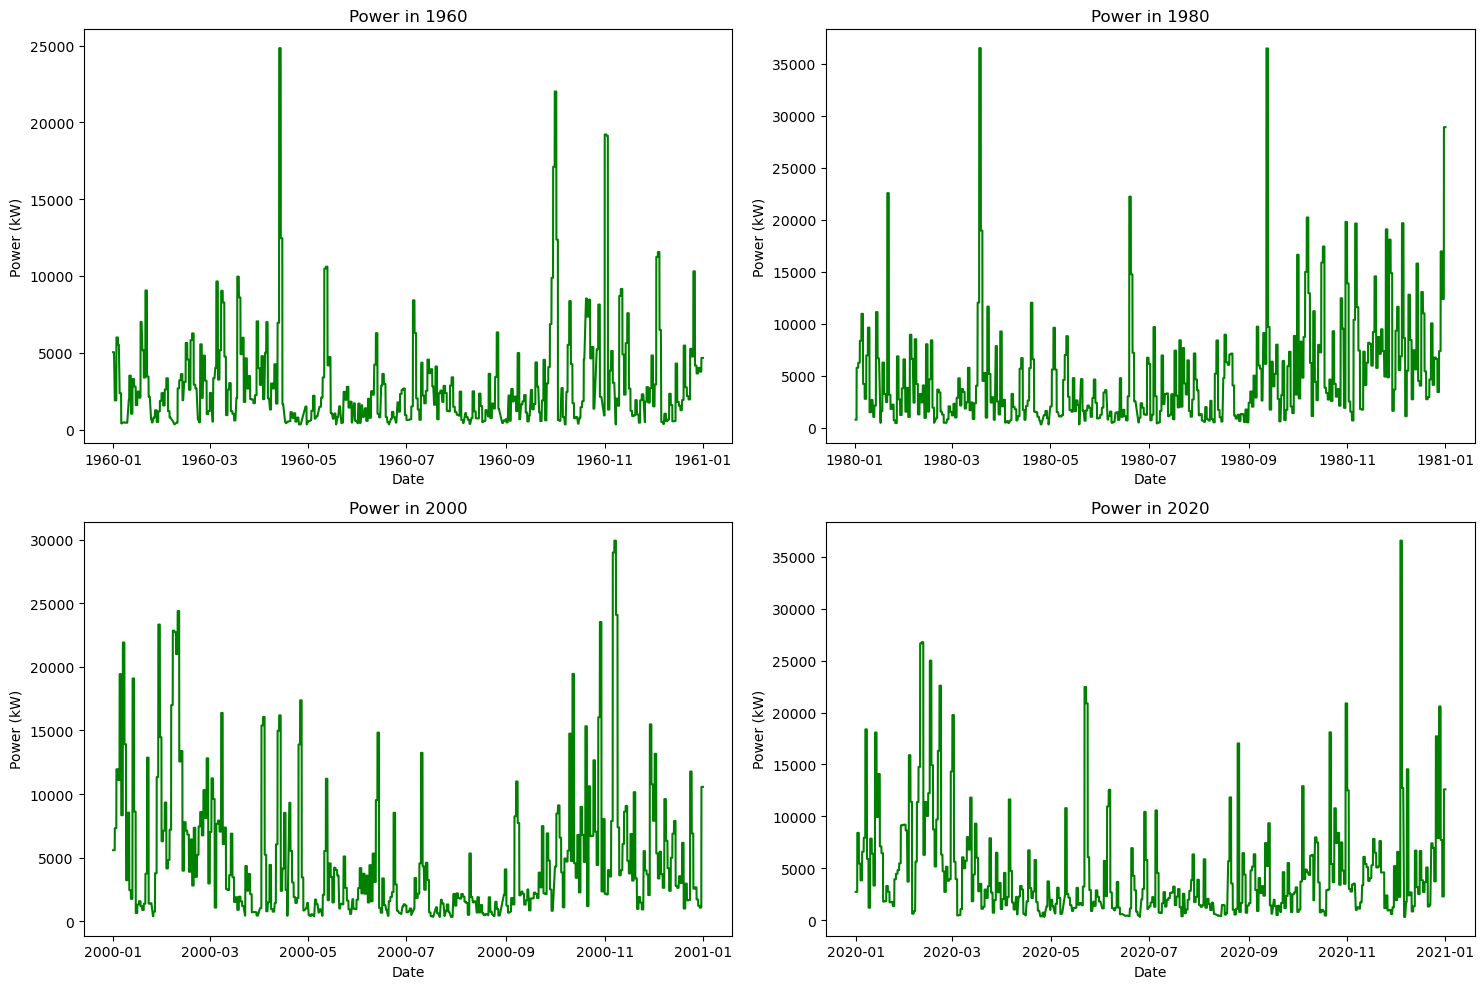

In [24]:
# Years to check.
years = [1960, 1980, 2000, 2020]

# Filter the DataFrame for the specified years.
df_year = {year: dfwp[dfwp["date"].dt.year == year] for year in years}

# Create a figure with subplots for each year.
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a line plot for each year.
for ax, year in zip(axs.flatten(), years):
    sns.lineplot(x="date", y="daily_mean_power", data=df_year[year], ax=ax, color="green")
    ax.set_title(f"Power in {year}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Power (kW)")

# Adjust layout.
plt.tight_layout()

It's visible that in both years, the energy production is generally higher after September, and also rentable at the beginning of the year, before May. The worst months are in the middle of the year, between May and September.

Considering the [Source Galileo project](https://malinheadoffshorewind.ie/about-project), the projection of [1 000 MW](https://www.unitconverters.net/power/kilowatt-to-megawatt.htm) of energy generated could be achieved in all of the 4 years, for several months, where the input of 1 windmill would be higher than 15 000 kW, and if there were 67 wind turbines in total, as demonstrated below:

$1 000 MW = 1 000 000 kW$

In [25]:
# Number of turbines that produce 1 000 MW.
turbines = 1000000 / 15000

# Print the rounded number.
print(f"The number of turbines necessary to reach the goal is: {round(turbines)}.")

The number of turbines necessary to reach the goal is: 67.


## Wind Speed VS Power
The higher the wind speed, the higher the power production. To confirm this, I plotted both variables side by side. In order to create a resumed plot, I considered only the monthly means. For this, I calculated the monthly mean power produced and added a new column. Then, I created a new DataFrame with the years of the last decade, from 2014 till now. After that, I defined each plot with seaborn, and I added a label on the y-axis for each variable, wind speed and power. The [plt.twinx()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html) mixed both plots, sharing the x-axis. Then, I defined the title, the label for the x-axis, added a legend and plotted.

In [26]:
# Calculate the monthly mean power.
monthly_mean_power = dfwp.groupby(months)["power_kw"].transform("mean")

# Create a new column.
dfwp["monthly_mean_power"] = monthly_mean_power

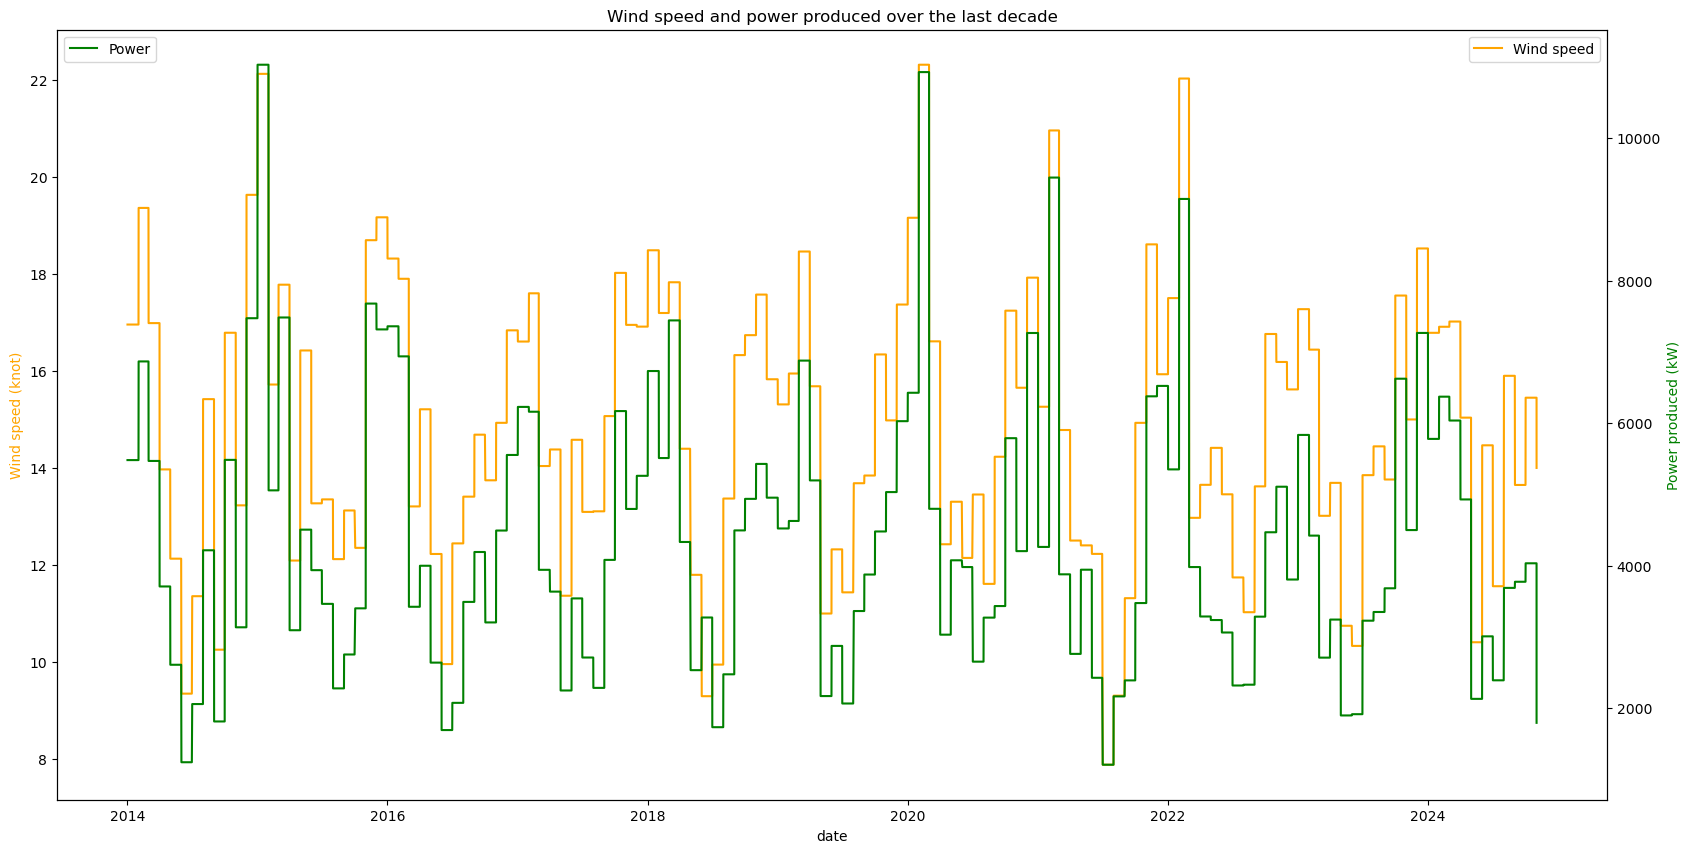

In [27]:
# Last decade.
dfdec = dfwp.loc[(dfwp["date"] >= "2014")]

# Set figure.
plt.figure(figsize=(20, 10))

# Plot for wind speed.
sns.lineplot(x="date", y="monthly_mean_wind", data=dfdec, label="Wind speed", color="orange")

# Label for wind speed.
plt.ylabel("Wind speed (knot)", color="orange")

# Create a twin Axes sharing the x-axis for 'temp'
ax2 = plt.twinx()

# Plot for power.
sns.lineplot(x="date", y="monthly_mean_power", data=dfdec, label="Power", color="green", ax=ax2)

# Label for power.
ax2.set_ylabel("Power produced (kW)", color="green")

# Add title.
plt.title("Wind speed and power produced over the last decade")

# Add x label.
plt.xlabel("Date")

# Add legend.
plt.legend(loc="upper left")


As expected, both plots show similar trends, but they're not completely the same either. For example, at the start of the years 2014 and 2018, the power produced could be similar, but the wind speeds were higher in 2014. Also, at the start of the years 2020 and 2022, it's highly visible that wind speeds were almost the same, but the power generated would be way lower in 2022.

### Correlation and regression
In any DataFrame, it's important to analyse the relation between variables as this increases our knowledge. As [G2 explains](https://www.g2.com/articles/correlation-vs-regression):

>  "Use correlation to summarize the strength and degree of the relationship between two or more numeric variables. Use regression when you’re looking to predict, optimize, or explain a number response between the variables"

#### Pearson coefficient and Seaborn regression model
In this section, I calculated the correlation of the energy produced with [.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html), considering each month. The correlation is equal to -0.073, which shows a weak correlation. For the regression, I plotted the data with a fit line with the [sns.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html), and selected the style for the plot with [sns.set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html). The regression line is convex, as expected because previous plots showed that the months in the middle of the year had the lowest energy production. Even though the correlation is non-existent, the regression line confirmed that energy production is usually higher in the first months and in the last months, as previously shown.

Power correlation per month is: -0.0732098822623549


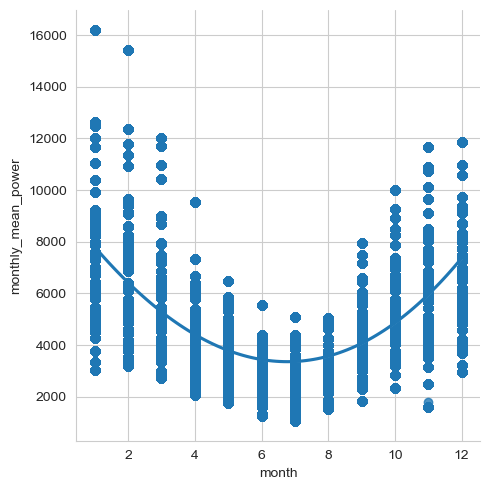

In [28]:
# Calculate the correlation between month and wind speed, and print.
corrwind = dfwp["month"].corr(dfwp["monthly_mean_power"], method="pearson")
print (f"Power correlation per month is: {corrwind}")

# Set grid style.
sns.set_style("whitegrid")

# Regression line plot.
sns.lmplot(x="month", y="monthly_mean_power", order=3, data=dfwp)

For the next analysis, I checked the relation between the monthly wind speeds and the power generated. The correlation is very high, approximately 0.94, as higher wind speeds produce more power. Then, the regression line shows a positive relationship, where one variable is easy to predict when the other one is taken into consideration.

Temperature correlation per month is: 0.9399245747925266


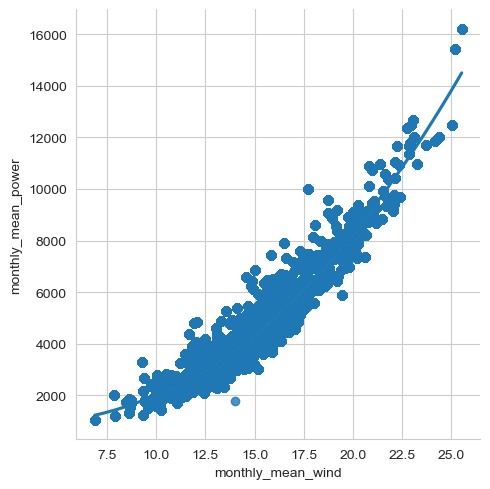

In [29]:
# Calculate correlation between wind and power, and print.
corrwp = dfwp["monthly_mean_wind"].corr(dfwp["monthly_mean_power"])
print(f"Temperature correlation per month is: {corrwp}")

# Set grid style.
sns.set_style("whitegrid")

# Define plot.
sns.lmplot(x="monthly_mean_wind", y="monthly_mean_power", order=3, data=dfwp)

#### Scikit-Learn
Another way to examine the relation between variables is by applying the Scikit-Learn library. [Tutorials point](https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm) stated that:

>"It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python"

##### K Neighbors
I imported and applied some of the scikit-learn features, in this case, the [K-Nearest Neighbors](https://www.ibm.com/think/topics/knn#What+is+the+KNN+algorithm%3F). This method enables the classification and predictions in a certain data point. 

Then I applied the [training machine learning model](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance), where the data is [split](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn#normalizing-&-splitting-the-data-whent) into training and test data.

Then the [StandardScaler](https://www.geeksforgeeks.org/what-is-standardscaler/) will make the features in X with standard values, with normalization of data, so none of them will be too apart from each other.

The [.fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform) fits the X train with the standard deviation values.

Then the [.transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) fits the X test values with the [same mean and variance](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe) from the training data.

After this, I can finally train the model with KNeighborsClassifier, fitting the training data with [.fit](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit).

Then I calculated the prediction of y with [.predict](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict), considering the X test. 

After that, I calculated the efficacy of this K-Nearest Neighbors method with the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), as this shows how many values the machine was able to predict correctly.

In [30]:
# Import libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features X.
x = dfwp[["power_kw", "daily_mean_power", "monthly_mean_power"]]

# Define target y.
y = dfwp["month"]

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y)

# Standardize the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.metrics import accuracy_score

# Initialize the KNN classifier.
knn = KNeighborsClassifier()

# Train the model.
knn.fit(X_train, y_train)

# Make predictions.
y_pred = knn.predict(X_test)

# Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score is: {accuracy * 100:.2f}%")

Accuracy score is: 53.48%


The accuracy score is approximately 53%, a reasonable result as all the data generated for the power was considered and put against the months. The accuracy would be much higher if feature X didn't include the column "power_kw", as this contains results that are way more dispersed compared with the summarised data found in "daily_mean_power" and "monthly_mean_power".

##### Linear Regression

In the next part, I did a simple linear regression with scikit-lear, with the steps demonstrated by [Real Python](https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn). For this, I imported the package LinearRegression from sklearn, then I identified the regressors x and the response y. The x must be two-dimensional, so I used [.reshape](https://www.w3schools.com/python/numpy/numpy_array_reshape.asp) to convert it. After that, I implemented the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model. Then I applied this model to the data with [.fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit). Then to evaluate if the model is adequate, the printed [.score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) shows how accurate the model is. The result is around 0.88, which indicates that this model fits almost perfectly. Then [.predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) shows the most predictable numbers in the response.

In [31]:
# Import libraries
from sklearn.linear_model import LinearRegression

# The regressors.
x = np.array(dfwp["monthly_mean_wind"]).reshape((-1, 1))

# The response.
y = dfwp["monthly_mean_power"]

# Linear regression model.
model = LinearRegression()

# Fit model in the parameters.
model = LinearRegression().fit(x, y)

# Score the model and print.
r_sq = model.score(x, y)
print(f"Coefficient of determination: {r_sq}")

# Show predictions.
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

Coefficient of determination: 0.8834582062991506
predicted response:
[4430.53481151 4430.53481151 4430.53481151 ... 4984.95345562 4984.95345562
 3977.75975383]


The linear regression can also be plotted. For this, I used the [train_test_spilt](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) model in the arrays x and y, as used above. Then, I split both into training and testing sets, with test_size showing the size of the test set and [random_state](https://scikit-learn.org/stable/glossary.html#term-random_state) representing the seed that controls randomisation. 

Then, I fitted the [Linear Regression model](https://realpython.com/train-test-split-python-data/#minimalist-example-of-linear-regression) in the training set and made predictions in the testing set.

Finally, I used Matplotlib to create [a figure](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#plotting-the-results), with a scatter of the testing set and a line with the predictions.

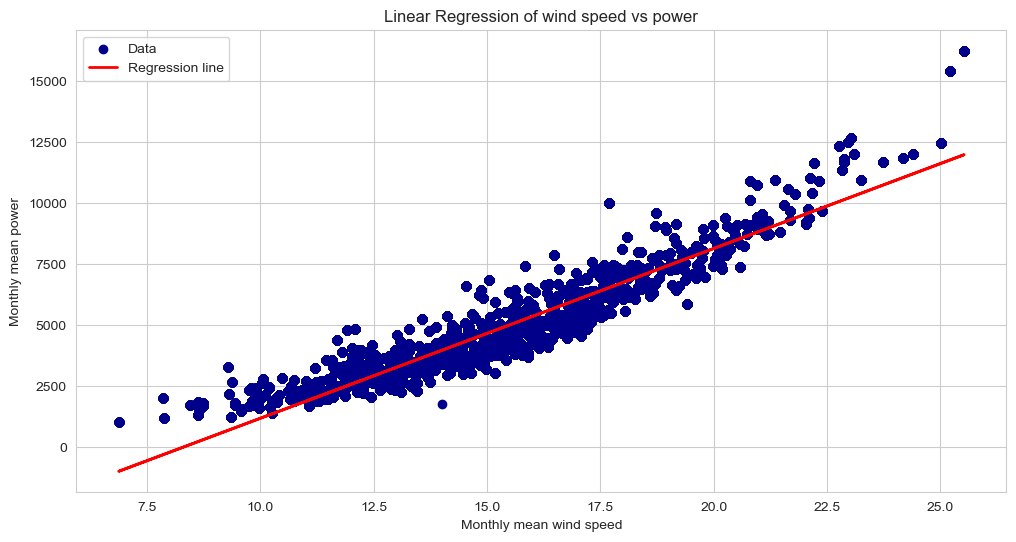

In [32]:
# Data, inputs.
x = np.array(dfwp["monthly_mean_wind"]).reshape((-1, 1))

# Target, outputs.
y = dfwp ["monthly_mean_power"]

# Split the arrays into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Fit the train in the Linear Regression model.
model = LinearRegression().fit(X_train, y_train)

# Prediction.
y_pred = model.predict(X_test)

# Plot the data and the regression line.
plt.figure(figsize=(12, 6))

plt.scatter(X_test, y_test, color="darkblue", label="Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression line")

# Add titles and labels.
plt.title("Linear Regression of wind speed vs power")
plt.xlabel("Monthly mean wind speed")
plt.ylabel("Monthly mean power")
plt.legend()

# Show the plot.
plt.show()

The regression line shows a strong association between the variables, with most of the scatter data appearing close to the line and following an increasing tendency.

#### Scatter
The relationship between variables can also be analysed with scatter plots. I used [sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to show the monthly mean wind speeds over time, with each value also including information on the power generated. 

<Axes: title={'center': 'Monthly mean of wind speeds and power produced over the years'}, xlabel='date', ylabel='monthly_mean_wind'>

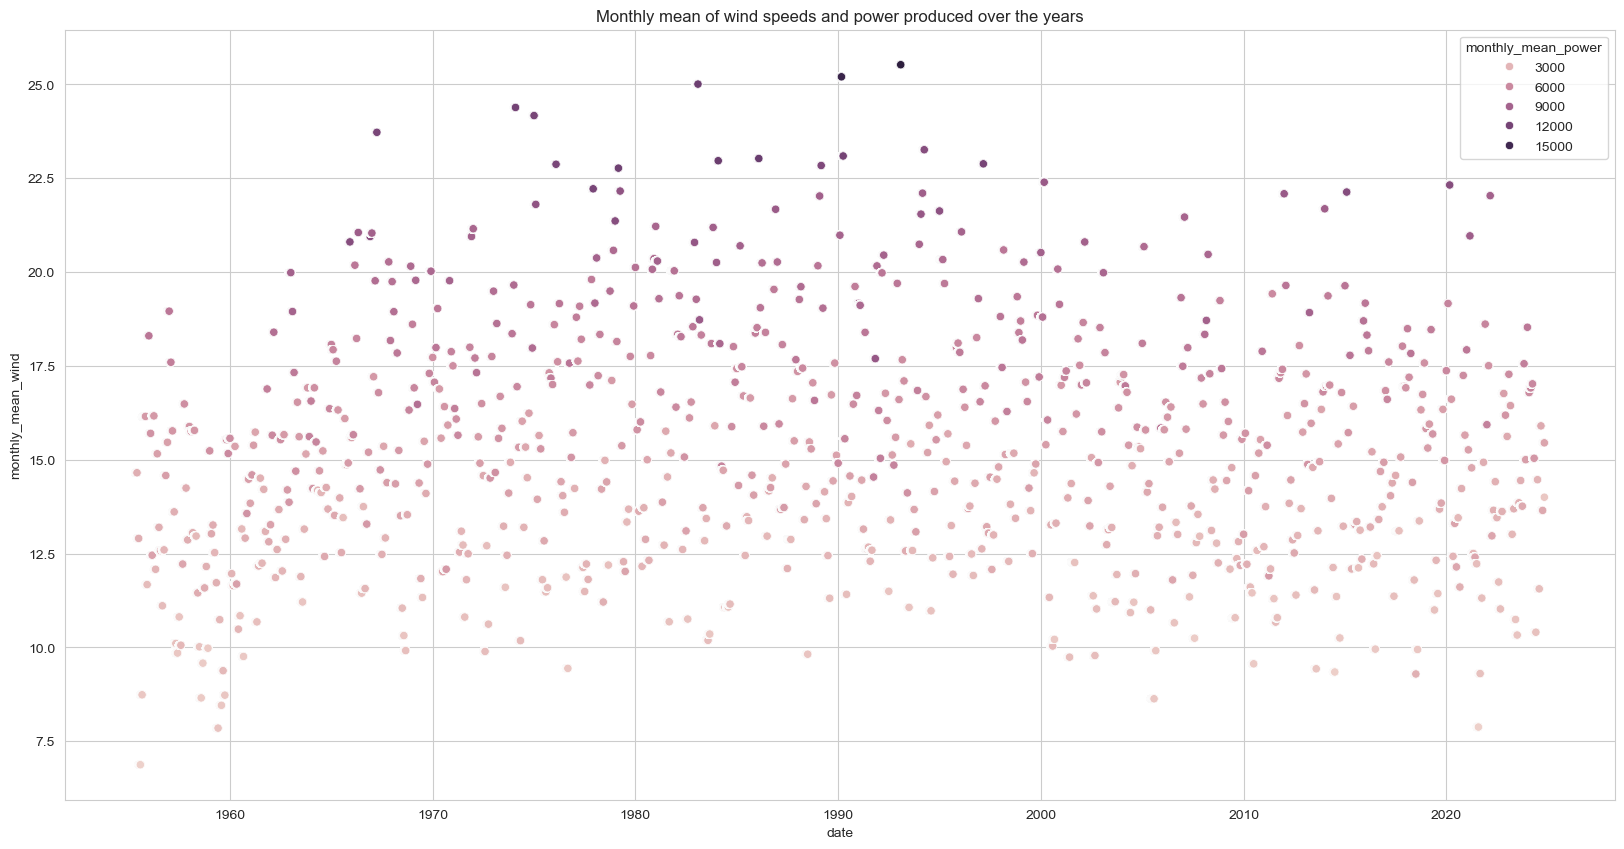

In [33]:
# Add title.
plt.title("Monthly mean of wind speeds and power produced over the years")

# Scatter plot.
sns.scatterplot(x=dfwp["date"],y=dfwp["monthly_mean_wind"], hue=dfwp["monthly_mean_power"])

This scatter also confirms that the higher the wind speed, the higher the power generated. The darker points representing the months with high power are usually located at the top, where the wind speeds are higher too.

## Rain, temperature and humidity
In this DataFrame there are other variables worth analysing, for example, the rain, temperature, and humidity. The rain represents the precipitation amount in millimetres, the temperature is in Celsius, and the humidity is in %.

### Clean and simplify the data
Before using this data, I cleaned it in the same way as previously done for "date" and "wdsp", applying the same codes.

In [34]:
# New DataFrame with the selected data.
df_rth=df[["date","rain", "temp", "rhum"]]

# Drop the empty values.
df_rth = df_rth[df_rth["rain"] != " "]
df_rth = df_rth[df_rth["temp"] != " "]
df_rth = df_rth[df_rth["rhum"] != " "]

# Convert variables into numeric type.
df_rth["rain"] = pd.to_numeric(df_rth["rain"], errors="coerce")
df_rth["rhum"] = pd.to_numeric(df_rth["rhum"], errors="coerce")

# Drop the "0" values.
df_rth = df_rth[df_rth["rain"] != 0]

To summarize the data, I calculated the monthly means for the 3 variables and created 3 new columns, using the same codes as before.

In [35]:
# Calculate the monthly means for each variable.
monthly_mean_rain = df_rth.groupby(months)["rain"].transform("mean")
monthly_mean_temp = df_rth.groupby(months)["temp"].transform("mean")
monthly_mean_hum = df_rth.groupby(months)["rhum"].transform("mean")

# Create a new column for each variable.
df_rth["monthly_mean_rain"] = monthly_mean_rain
df_rth["monthly_mean_temp"] = monthly_mean_temp
df_rth["monthly_mean_hum"] = monthly_mean_hum

# Check
df_rth.head()

,date,rain,temp,rhum,monthly_mean_rain,monthly_mean_temp,monthly_mean_hum
5,1955-05-01 06:00:00,0.1,8.4,91,0.483448,8.049655,88.848276
7,1955-05-01 08:00:00,0.1,9.2,88,0.483448,8.049655,88.848276
8,1955-05-01 09:00:00,0.2,9.3,84,0.483448,8.049655,88.848276
9,1955-05-01 10:00:00,1.1,8.8,89,0.483448,8.049655,88.848276
10,1955-05-01 11:00:00,3.0,8.3,91,0.483448,8.049655,88.848276


### Plots
#### Rain vs Temperature
Then to visualize it, I created a plot with a line and a histogram, [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html), representing the temperature and the rain, respectively, along the months.

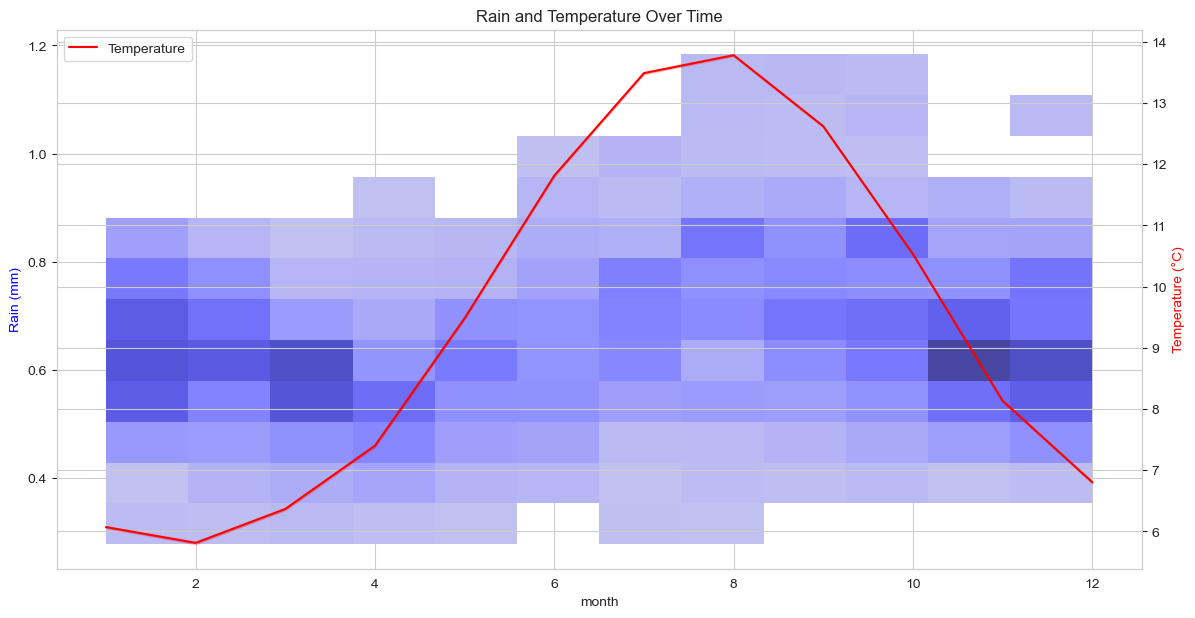

In [36]:
# Set the figure size.
plt.figure(figsize=(14, 7))

# Plot the rain.
sns.histplot(x=dfwp['month'], y=df_rth['monthly_mean_rain'], bins=12, color='blue')

# set y label for the histogram.
plt.ylabel('Rain (mm)', color='blue')

# Create a twin axes sharing the x-axis, "month".
ax2 = plt.twinx()

# Plot for temperature.
sns.lineplot(x=dfwp['month'], y=df_rth['monthly_mean_temp'], label='Temperature', color='red', ax=ax2)

# Set y label for the line plot.
ax2.set_ylabel('Temperature (°C)', color='red')

# Add title, x label, legend and show.
plt.title('Rain and Temperature Over Time')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


The precipitation amount of rain is usually more frequent between 0.4 mm and 0.8 mm, when the temperature is between 7 and 11 C. Rain is less common when temperatures are below or higher. Also, the rain is common all year round, but more frequent between January and April and September and December. The histogram area is bigger during the summer, and the amount of rain is not as consistent, as it can rain very little or a lot.

For the temperature, usually the coldest month is February and the hottest is August.

#### Temperature in different years
For the next observation, I plotted the temperature in [3 different decades](https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial#creating-a-seaborn-line-plot-with-multiple-lines-techn), to see if there was a similar tendency. To execute this, I created 3 new DataFrames, where each of them has only the data from the [year selected](https://stackoverflow.com/a/46878184).

<Axes: xlabel='month', ylabel='monthly_mean_temp'>

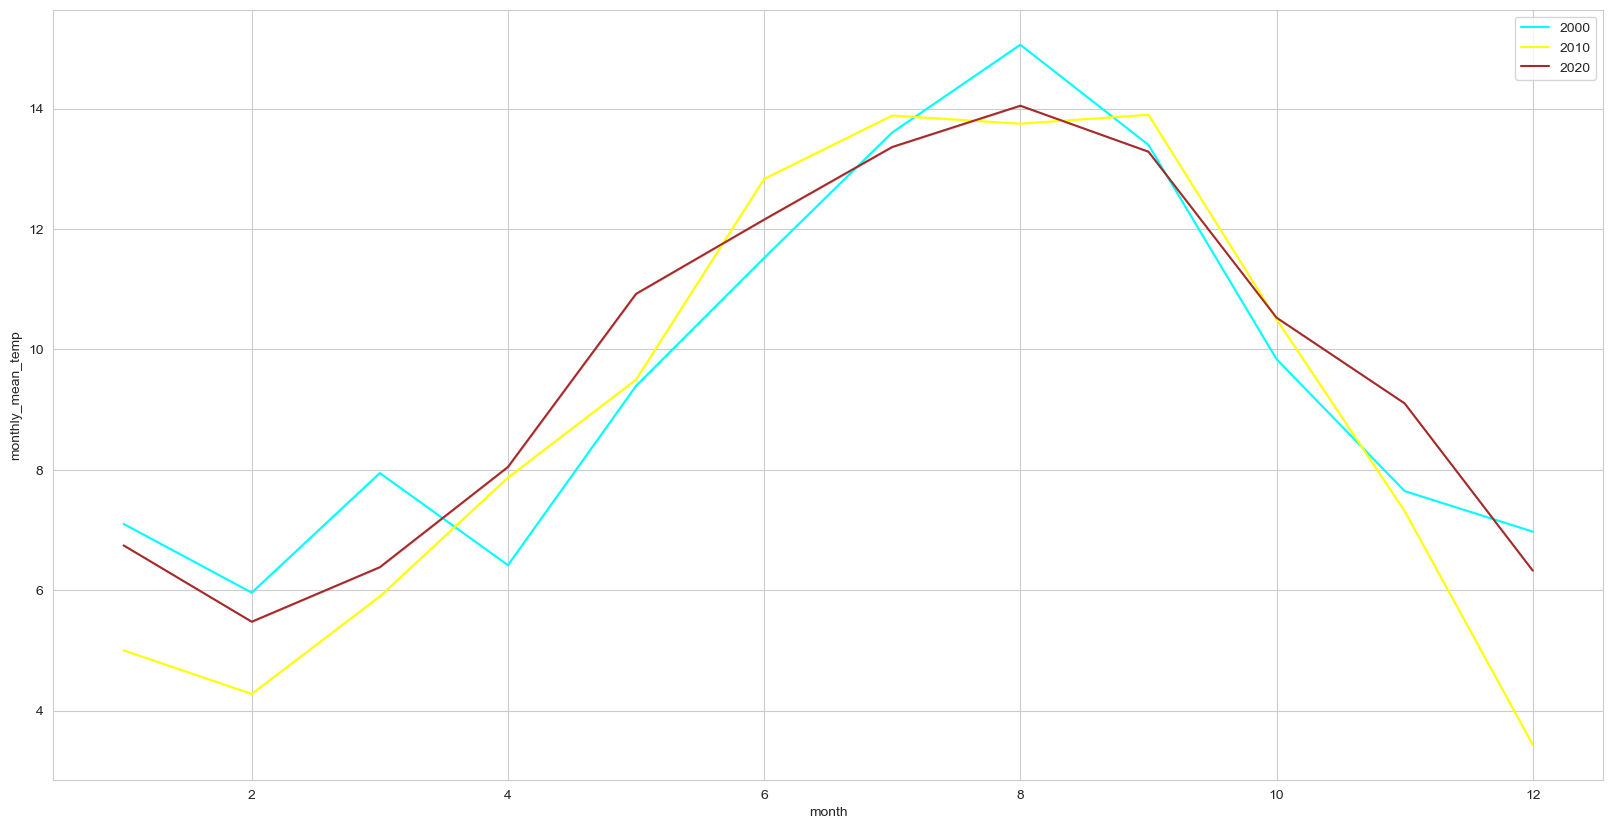

In [37]:
# Create DataFrame with only the data in the following years.
df_rth00 = df_rth[df_rth["date"].dt.year ==2000]
df_rth10 = df_rth[df_rth["date"].dt.year ==2010]
df_rth20 = df_rth[df_rth["date"].dt.year ==2020]


# Create a line plot for the 3 variables.
sns.lineplot(x=dfwp["month"], y=df_rth00['monthly_mean_temp'], color='cyan', label="2000")
sns.lineplot(x=dfwp["month"], y=df_rth10['monthly_mean_temp'], color='yellow', label="2010")
sns.lineplot(x=dfwp["month"], y=df_rth20['monthly_mean_temp'], color='brown', label="2020")

The graph shows that the temperature was similar in both years, with the temperature matching the tendency to increase and decrease during the months. There are some differences too, for example, the coldest month in 2020 and 2000 was February, but in 2010 was December. Then, the hottest month in both 2020 and 2000 was August, and in 2010 both July and September months were considered the hottest.

#### Rain vs Temperature vs Humidity 
To evaluate the 3 variables closely, I created a figure with the 3 [plots side by side](https://aeturrell.github.io/coding-for-economists/vis-matplotlib.html#ticks-locators-and-formatters), from the year 2020 onwards.

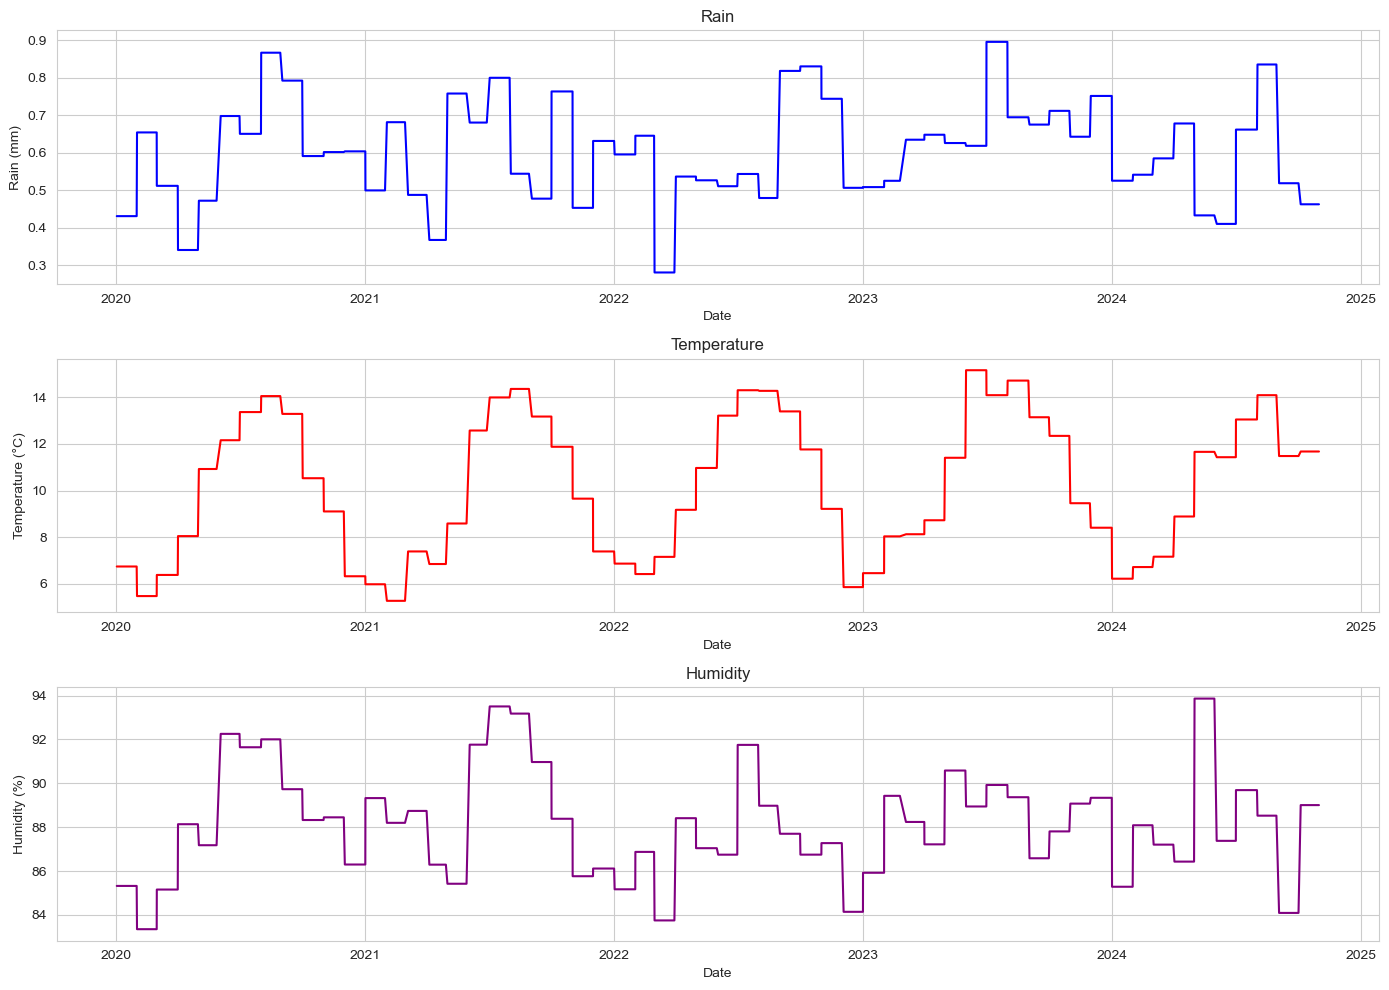

In [38]:
# Create subplots.
fig, ax = plt.subplots(3, 1, figsize=(14, 10))

# New DataFrame with only the data from 2020 onwards.
dfdec = df_rth[df_rth["date"].dt.year >=2020]

# Subplot for rain.
sns.lineplot(x="date", y="monthly_mean_rain", data=dfdec, ax=ax[0], color="blue")
ax[0].set_title("Rain")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Rain (mm)")

# Subplot for temperature.
sns.lineplot(x="date", y="monthly_mean_temp", data=dfdec, ax=ax[1], color="red")
ax[1].set_title("Temperature")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Temperature (°C)")

# Subplot for humidity.
sns.lineplot(x="date", y="monthly_mean_hum", data=dfdec, ax=ax[2], color="purple")
ax[2].set_title("Humidity")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Humidity (%)")

# Adjust layout to avoid overlap.
plt.tight_layout()

# Show the plots
plt.show()

The precipitation amount of rain was higher in 2023 and 2024. 
The temperature was similar in all the years. 
The humidity % was lower and more consistent in 2023, and higher all year round in 2021. The higher peak of humidity was in 2024, but then it dropped a lot after that.

### Correlation and Regression
In the next step, I calculated the correlation between the variables, to analyse if it's worth establishing a relation between any of them. There is a very easy way to [check the correlation](https://www.datacamp.com/tutorial/tutorial-datails-on-correlation#calculating-correlation-in-python) between all the variables in the DataFrame, and this can be done with a heat map, [sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

<Axes: >

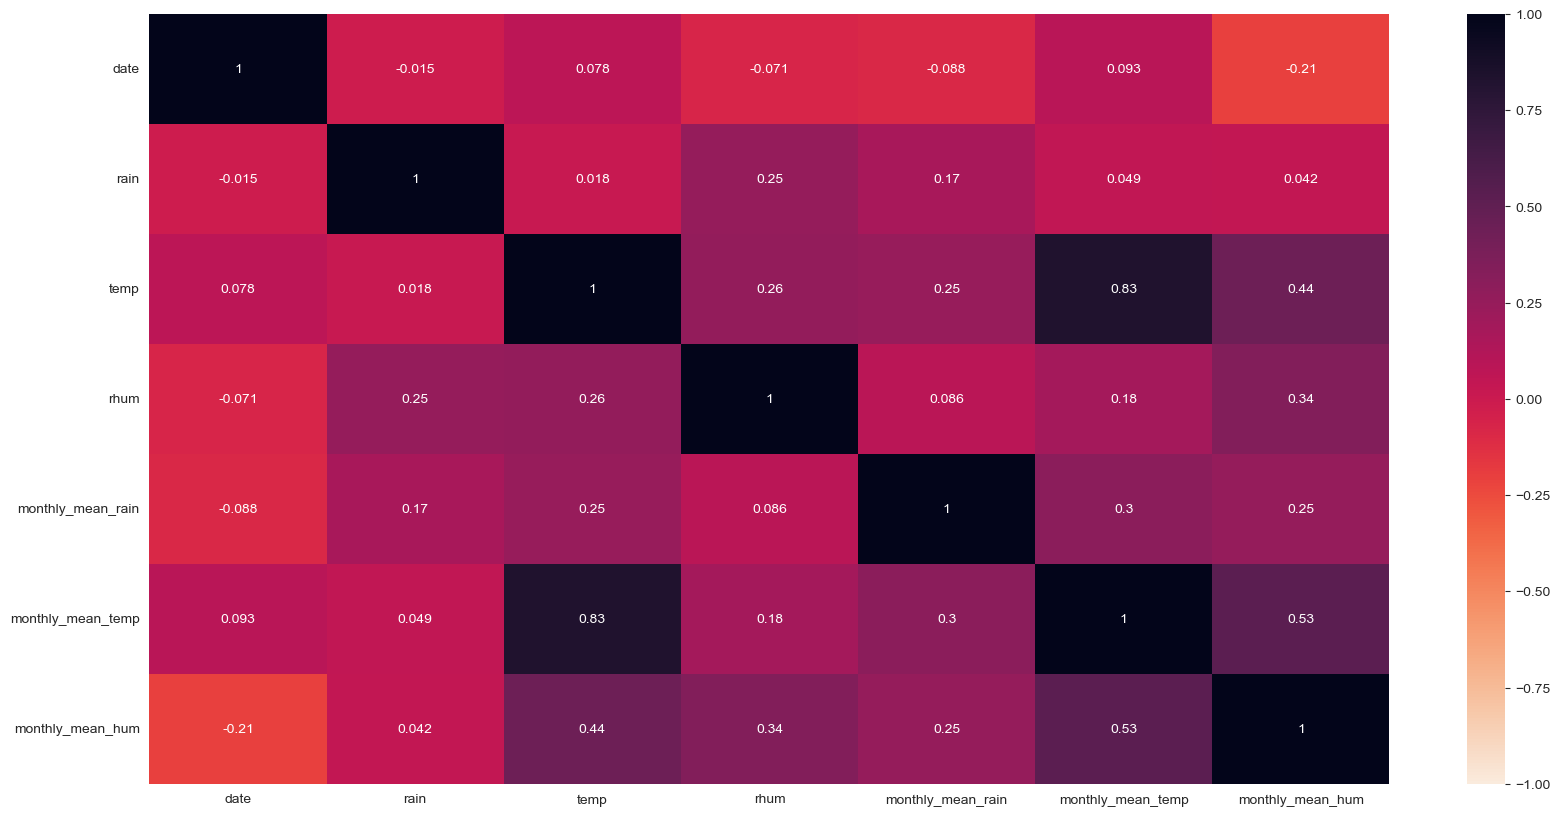

In [39]:
# Plot
sns.heatmap(df_rth.corr(), vmin=-1, vmax=1, annot=True,cmap="rocket_r")

In [40]:
# Correlation.
corrth = df_rth["monthly_mean_temp"].corr(df_rth["monthly_mean_hum"])
corrtr = df_rth["monthly_mean_temp"].corr(df_rth["monthly_mean_rain"])
corrhr = df_rth["monthly_mean_hum"].corr(df_rth["monthly_mean_rain"])

#print(f"Temperature correlation per month is: {corrtemp}")
print(f"Correlation between temperature and humidity is: {corrth}")
print(f"Correlation between temperature and rain is: {corrtr}")
print(f"Correlation between humidity and rain is: {corrhr}")

Correlation between temperature and humidity is: 0.5304305239896606
Correlation between temperature and rain is: 0.29720030001726055
Correlation between humidity and rain is: 0.2528918888951656


The only variables that correspond to different weather aspects and have a supposed correlation are temperature and humidity, as the Pearson coefficient is approximately 0.53. The other variables don't show any correlation as the results are lower than 0.3. 

Now for the [regression](https://seaborn.pydata.org/tutorial/regression.html), I used these variables that showed good correlation. The function [sns.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) plots a scatter with a regression line of the temperature against humidity.

<Axes: xlabel='monthly_mean_temp', ylabel='monthly_mean_hum'>

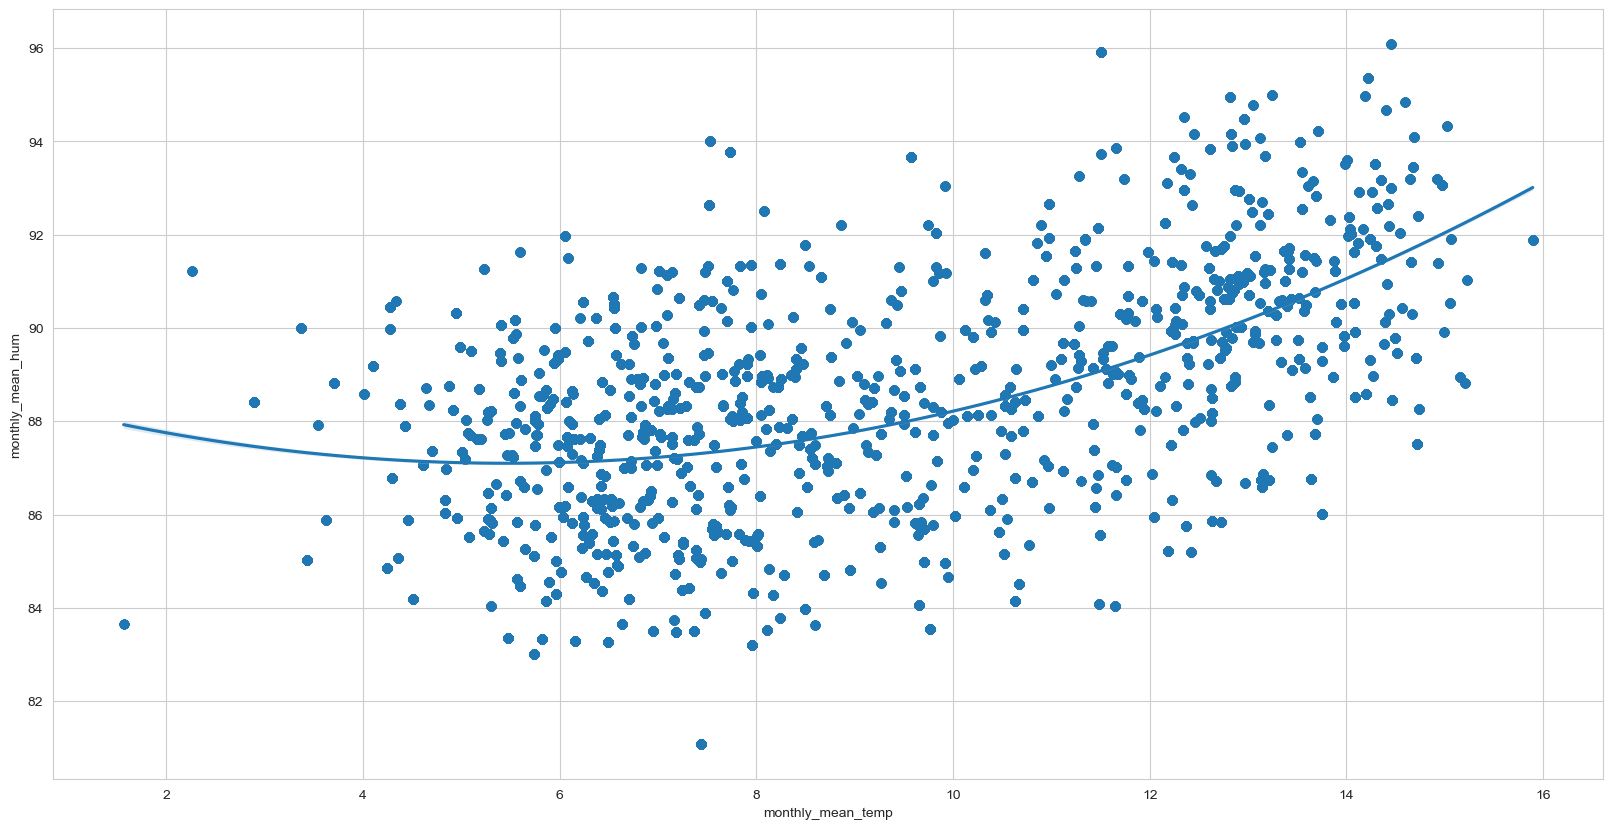

In [41]:
# Plot.
sns.regplot(x="monthly_mean_temp", y="monthly_mean_hum", data=df_rth, order=2)

As expected, the scatter shows a positive and moderate correlation between temperature and humidity, where both variables usually increase when the other increases as well.

----
## END